# Dynamic Unbalanced Optimal Transport Using Proximal Splitting

In this notebook, we test our code for UOT with proximal splitting. The algorithm and the code is based on Chizat et al. (2018).


In [19]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from proximal.grids import speed_and_growth
from proximal.dynamicUOT import computeGeodesic

# Experiment 1. Recreation of "Travelling Gaussian bumps in 1d" in Chizat et al. (2018)
We will recreate their result regarding the OT of travelling Gaussian bumps.

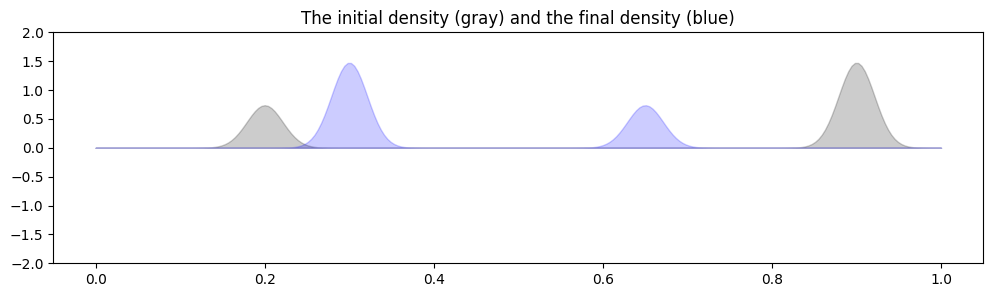

In [3]:
# Plotting initial and the final density

sigma = 0.03
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, 0.2, sigma, 1) + gauss(X, 0.9, sigma, 2)  # Initial density
rho_1 = gauss(X, 0.3, sigma, 2) + gauss(X, 0.65, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 30
rho_1 /= np.sum(rho_1) / 30

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-2, 2)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

In [4]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, niter=3000)

Computing a geodesic for optimal transport with source...
Progress: 99%
Donny.


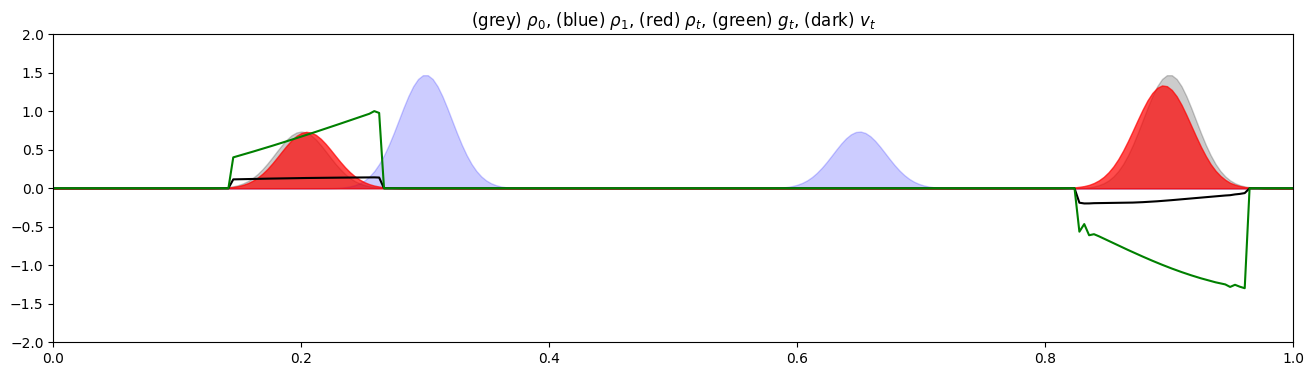

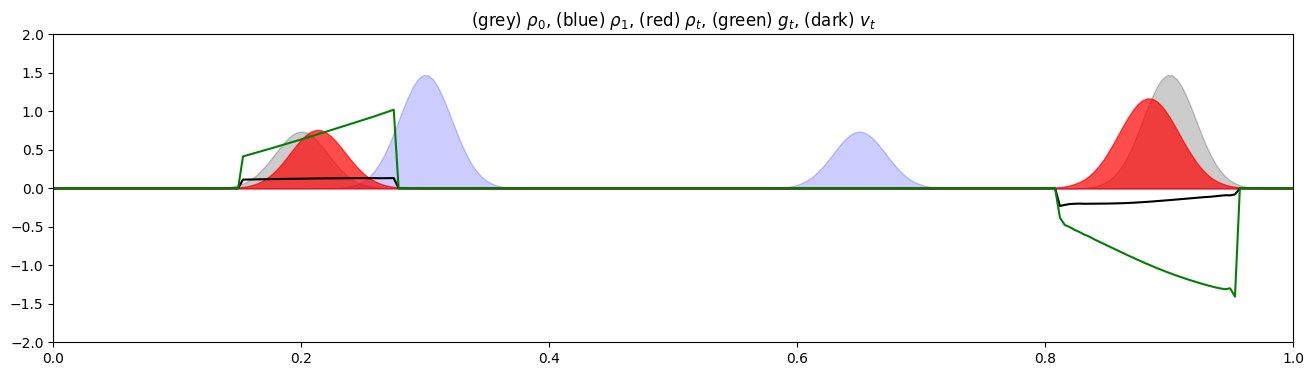

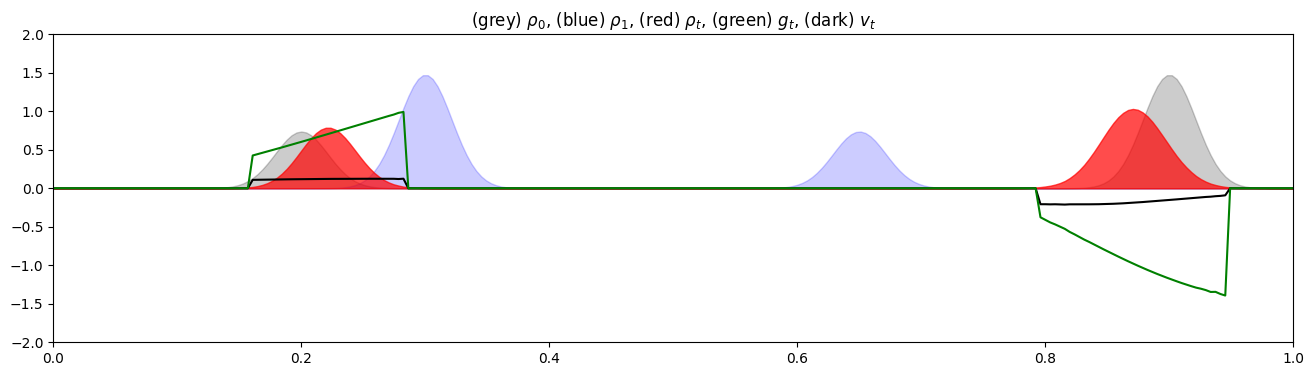

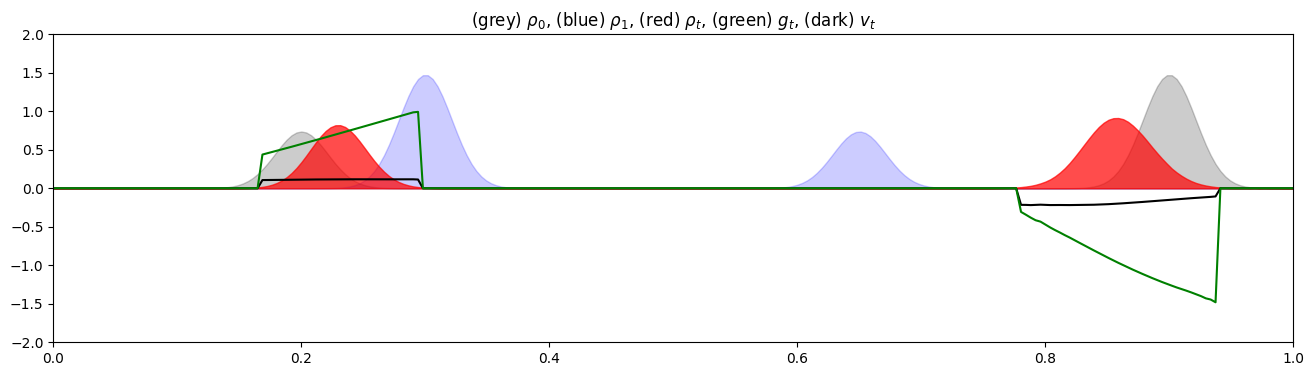

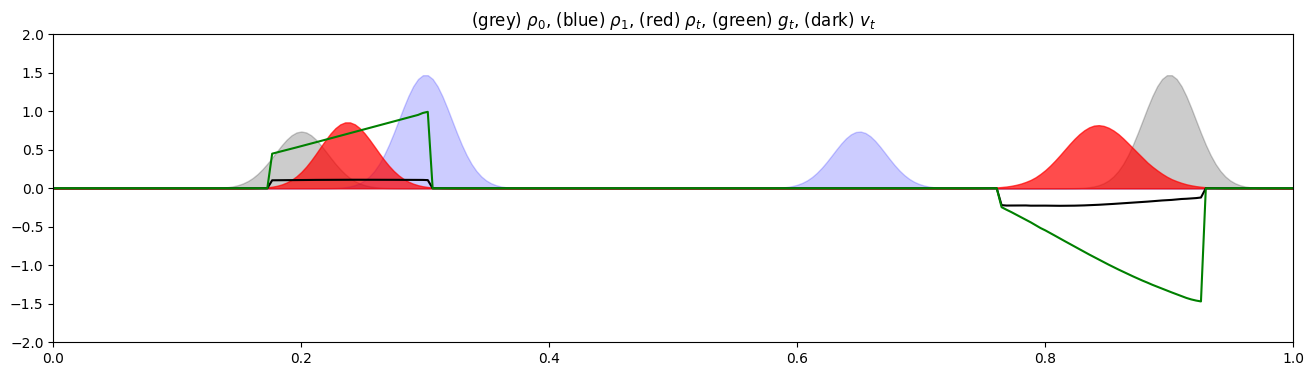

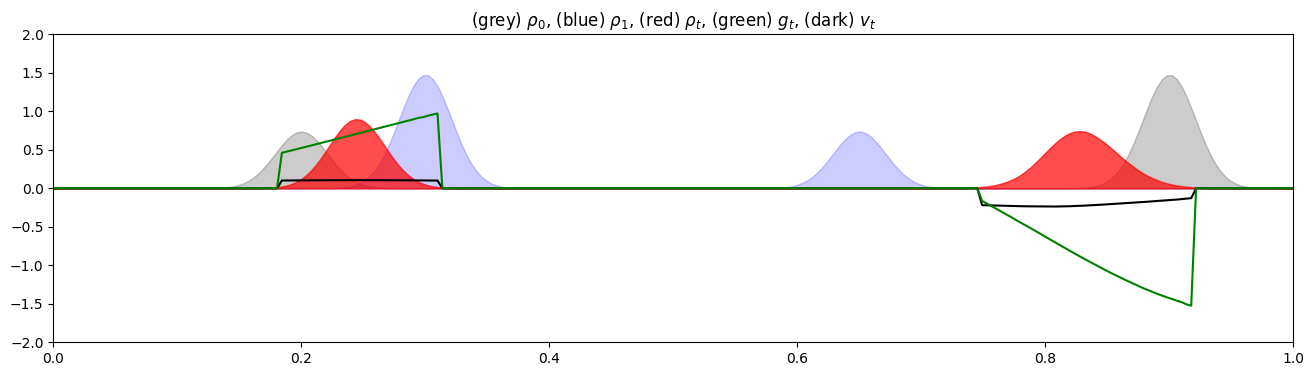

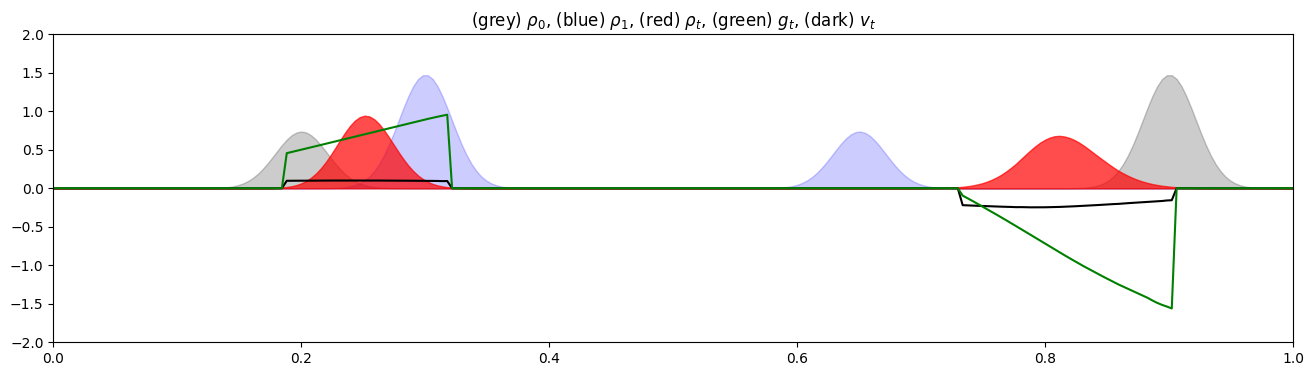

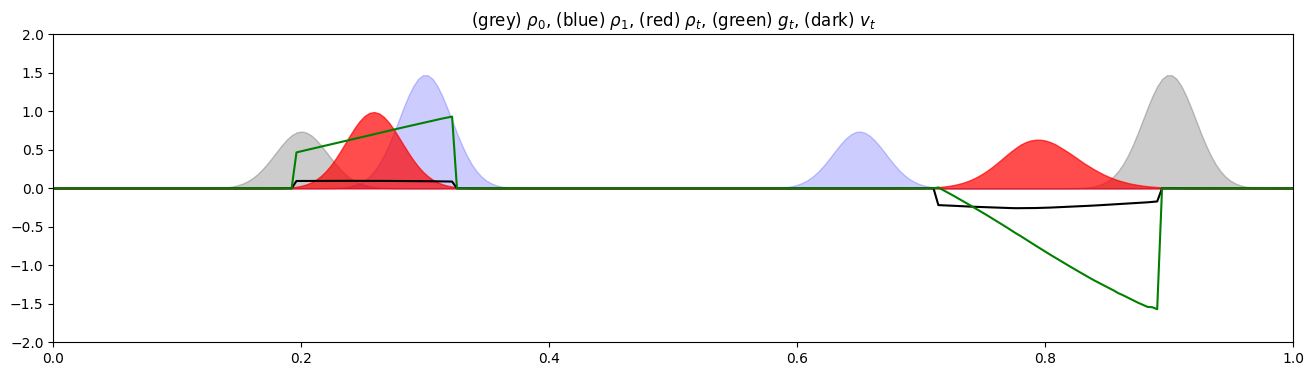

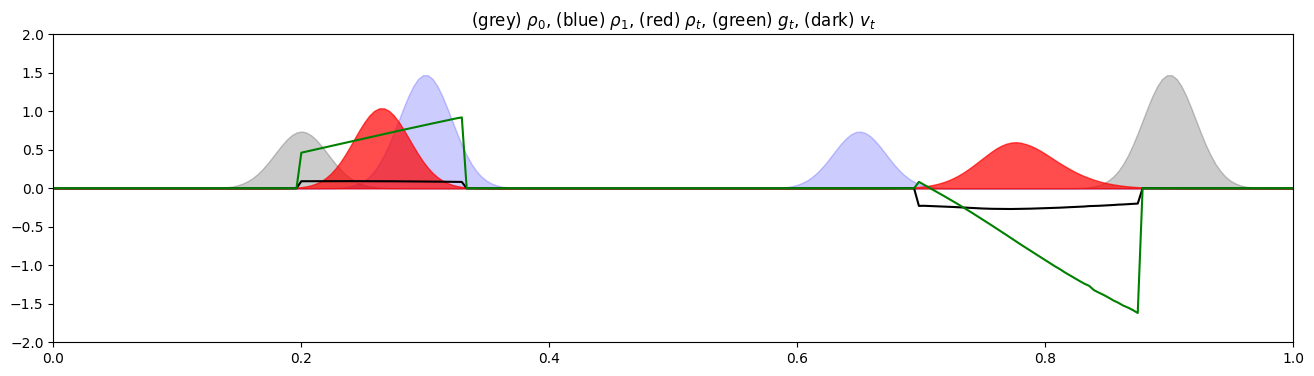

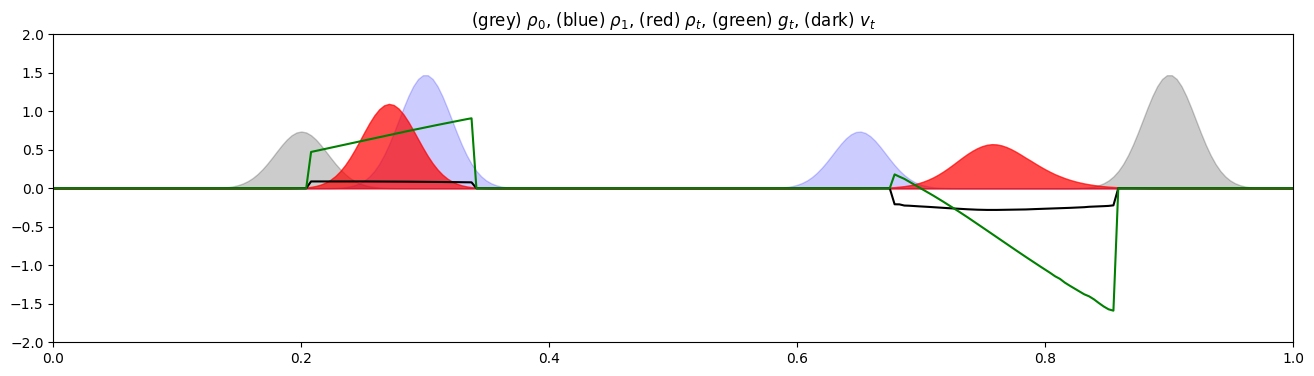

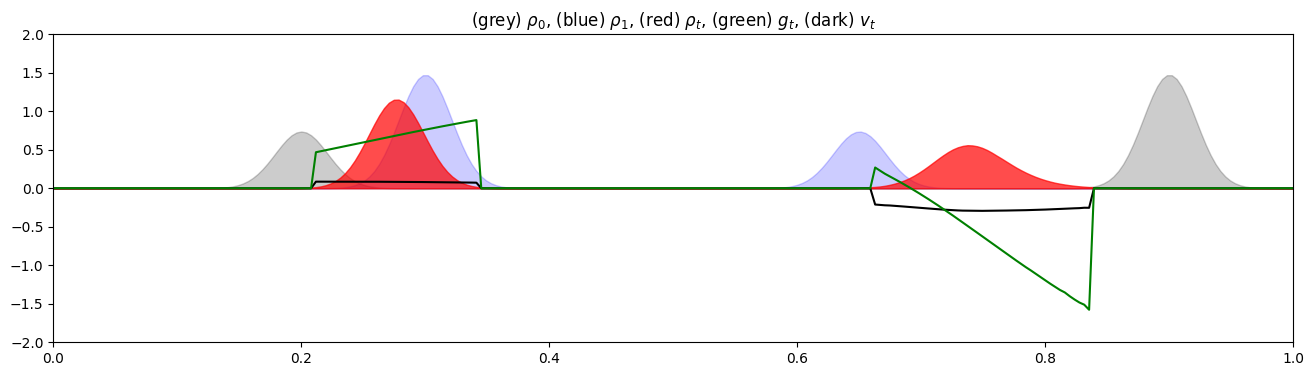

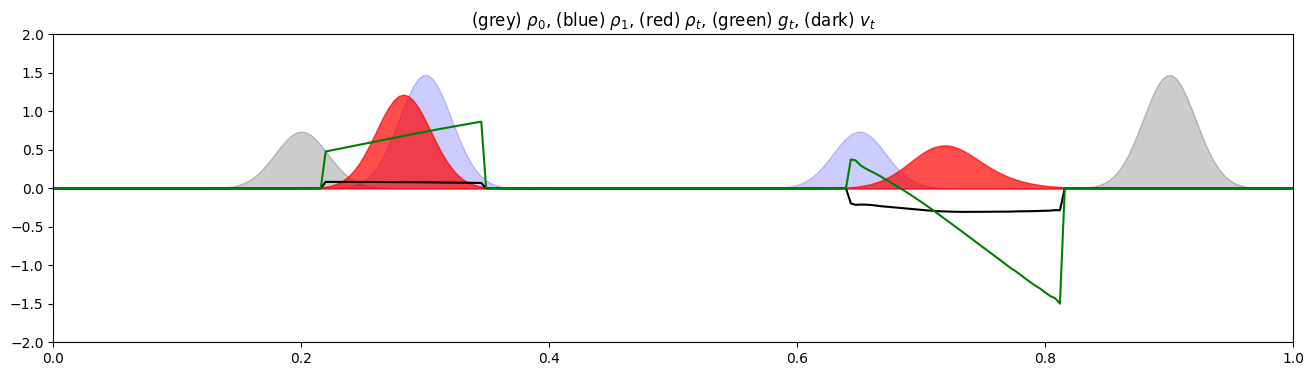

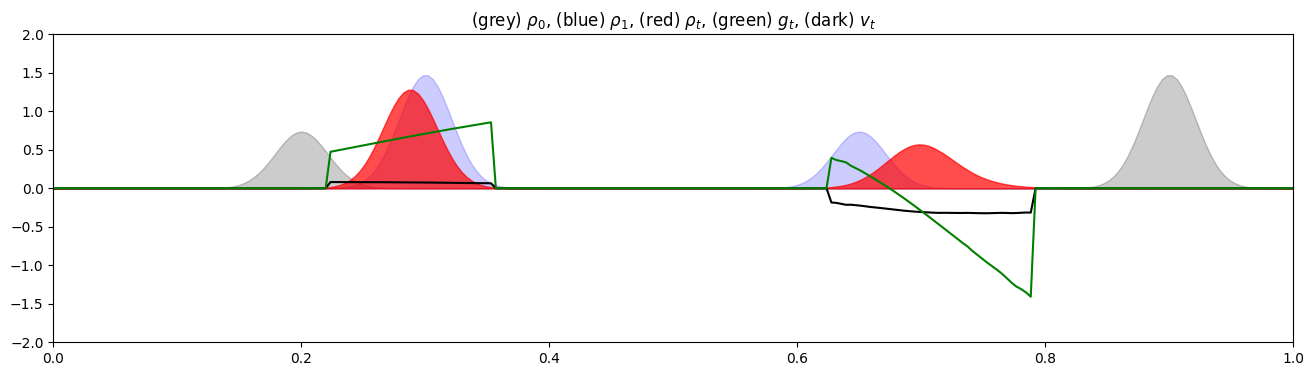

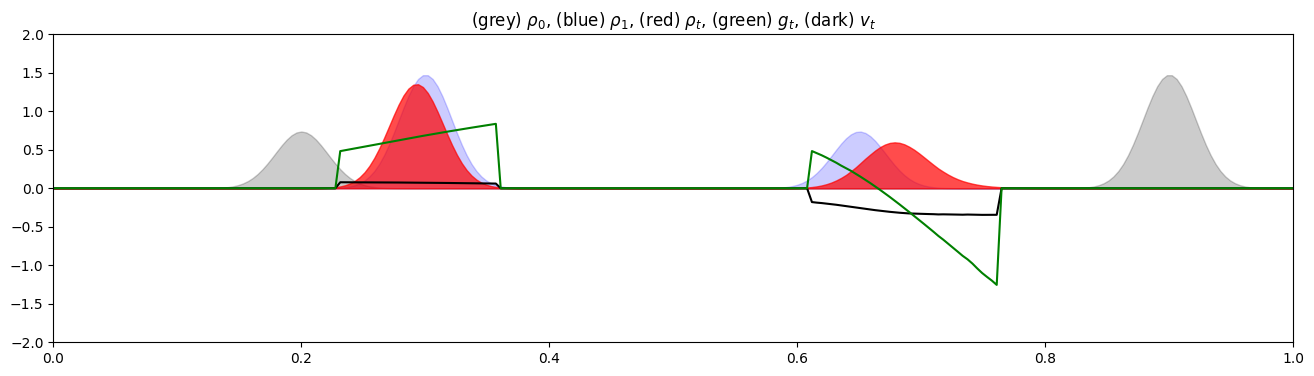

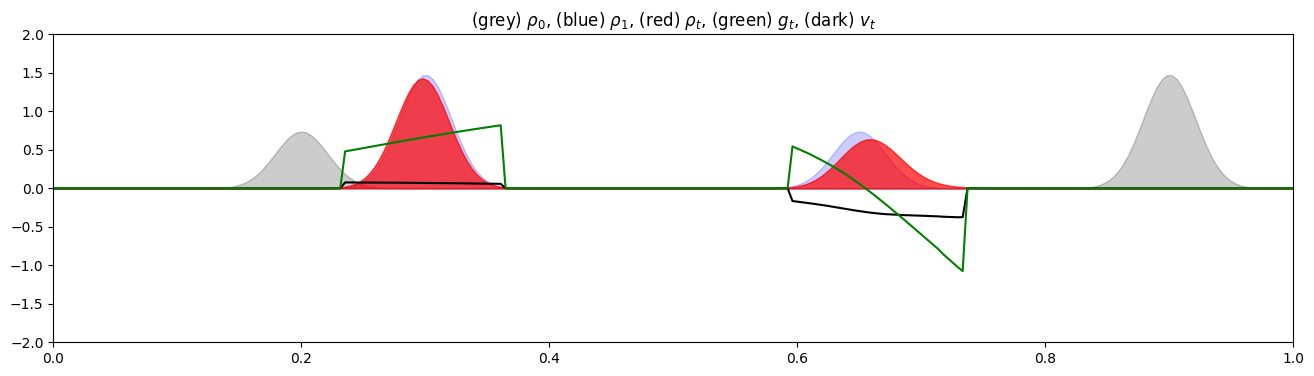

In [6]:
v,g = speed_and_growth(x.V)
for t in range(0, T):
    plt.figure(figsize=(16, 4))
    plt.fill_between(X, rho_0, color="k", alpha=0.2)
    plt.fill_between(X, rho_1, color="b", alpha=0.2)
    plt.fill_between(X, x.V.D[0][t], color="r", alpha=0.7)  # Adjust index for 0-based Python
    plt.plot(X, v[0][t, :], "k")
    plt.plot(X, g[t, :], "g")  # Adjust index for 0-based Python
    plt.title("(grey) $\\rho_0$, (blue) $\\rho_1$, (red) $\\rho_t$, (green) $g_t$, (dark) $v_t$")
    plt.axis([0, 1, -2, 2])
    plt.show()

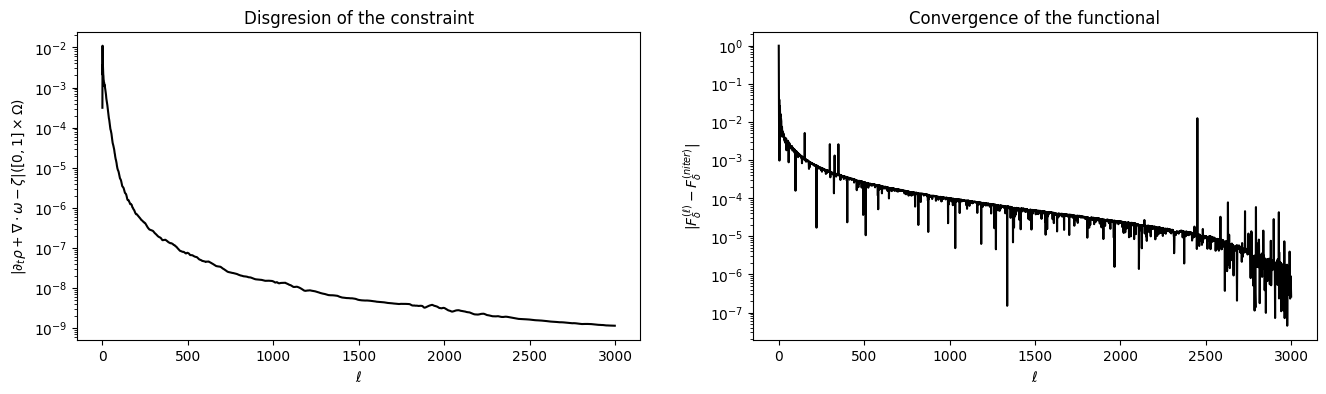

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.ylabel(r"$|\partial_t \rho + \nabla \cdot \omega - \zeta|([0,1]\times \Omega)$")
plt.xlabel(r"$\ell$")
plt.title("Disgresion of the constraint")
plt.semilogy(lists[1], "k")

plt.subplot(1, 2, 2)
plt.ylabel(r"$|F_{\delta}^{(\ell)}-F_{\delta}^{(niter)}|$")
plt.xlabel(r"$\ell$")
plt.title("Convergence of the functional")
minF = np.min(lists[0][-10:])
plt.semilogy(np.minimum(1, np.abs(lists[0] - np.mean(lists[0][-10:]))), "k")

plt.show()

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from proximal.grids import speed_and_growth
from proximal.dynamicUOT import computeGeodesic

# Plotting initial and the final density

sigma = 0.03
K = 256
X = torch.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = torch.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / torch.sum(normalized_factor))

rho_0 = gauss(X, 0.2, sigma, 1) + gauss(X, 0.9, sigma, 2)  # Initial density
rho_1 = gauss(X, 0.3, sigma, 2) + gauss(X, 0.65, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= torch.sum(rho_0) / 30
rho_1 /= torch.sum(rho_1) / 30

# Send to GPU
rho_0 = rho_0.to('cuda')
rho_1 = rho_1.to('cuda')

T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, niter=3000)

Computing a geodesic for optimal transport with source...
Progress: 99%
Done.


## Experiment 2: Total Mass Constraint $\rho_t(\Omega) = 2(t-1/2)^2 +1/2$ between the same distribution
In this experiment, we consider the "transport" of the same distribution but with the total mass constraint. As a result, the distribution should shrink and come back. 

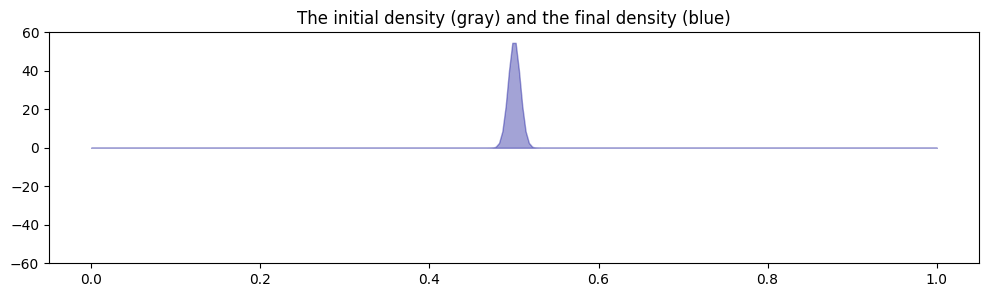

In [17]:
# Plotting initial and the final density

sigma = 0.01
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, 0.5, sigma, 1) # Initial density
rho_1 = gauss(X, 0.5, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 256 # make sure the total mass is 1
rho_1 /= np.sum(rho_1) / 256

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-60, 60)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

In [3]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
H = np.ones((T,K))
time = np.array([(i+0.5)/T for i in range(0,T)])
F = 2*(time - 0.5)**2 + 0.5
x, lists = computeGeodesic(rho_0, rho_1, T, ll, H, F, p= 2.0, q=2.0, delta=0.5/np.pi, niter=3000)

Computing a geodesic for optimal transport with source...
Progress: 99%
Donny.


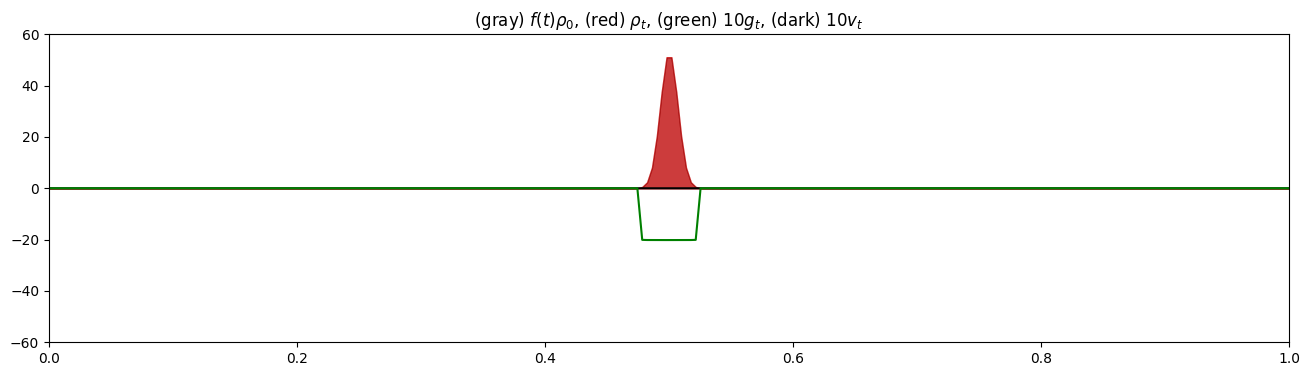

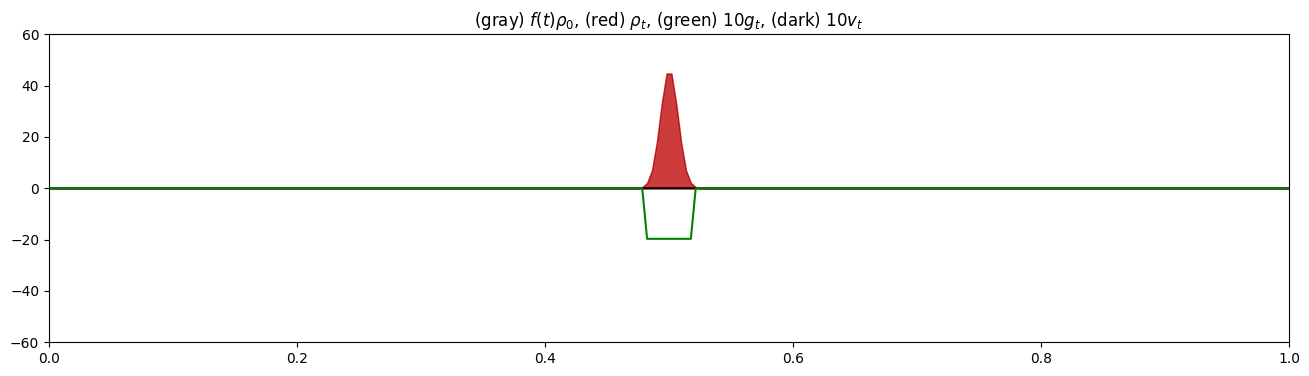

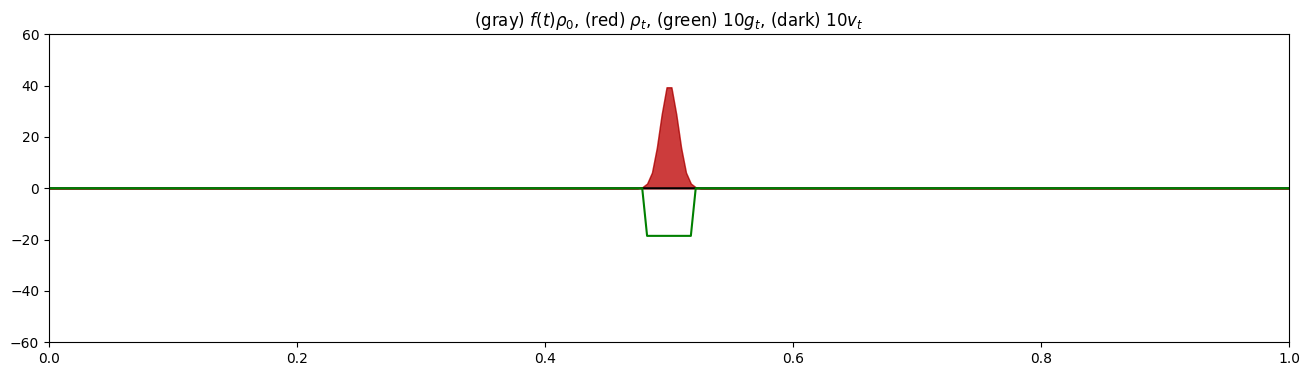

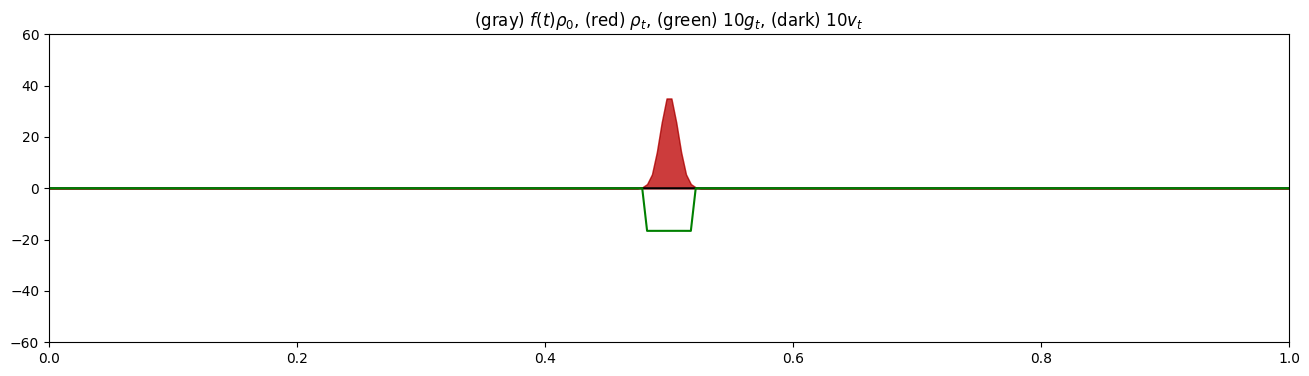

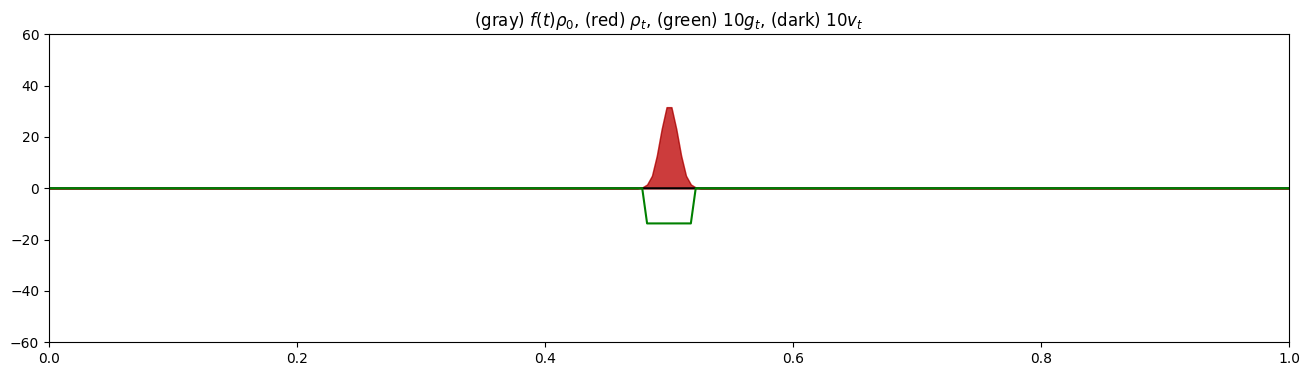

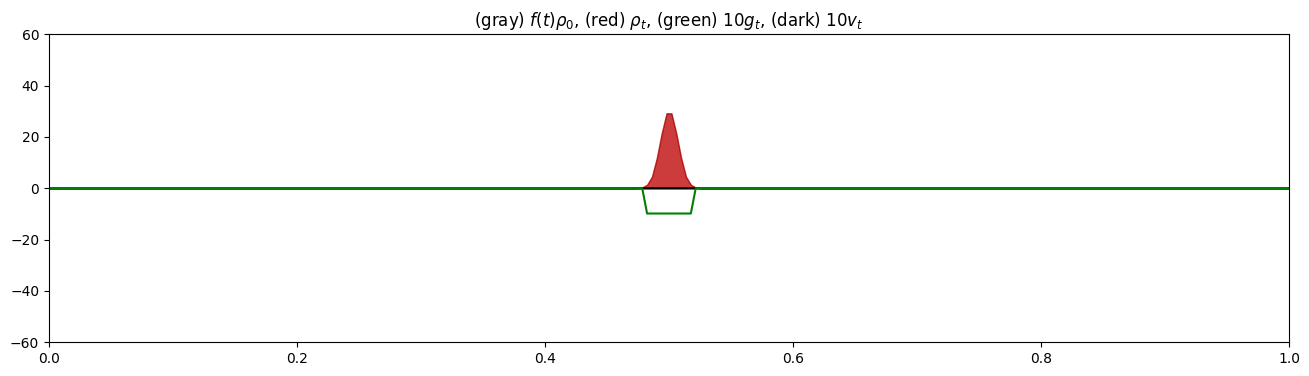

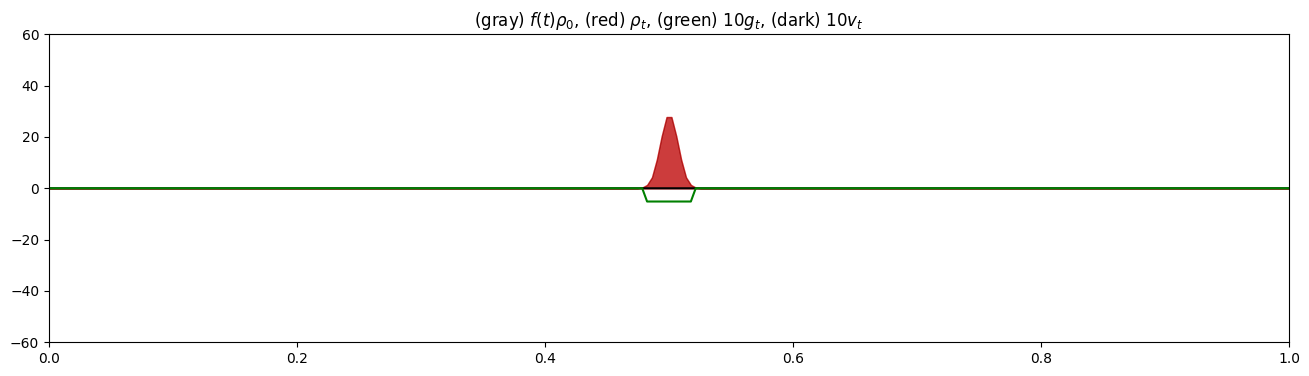

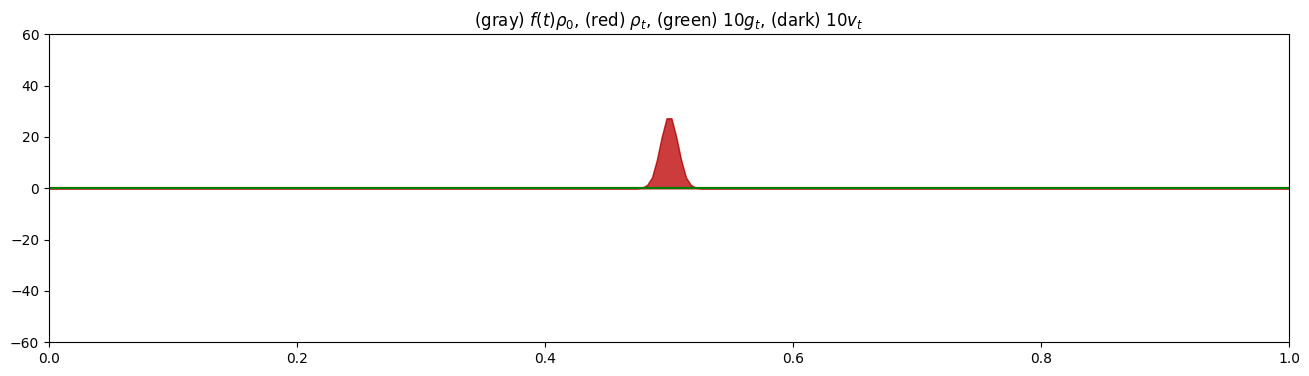

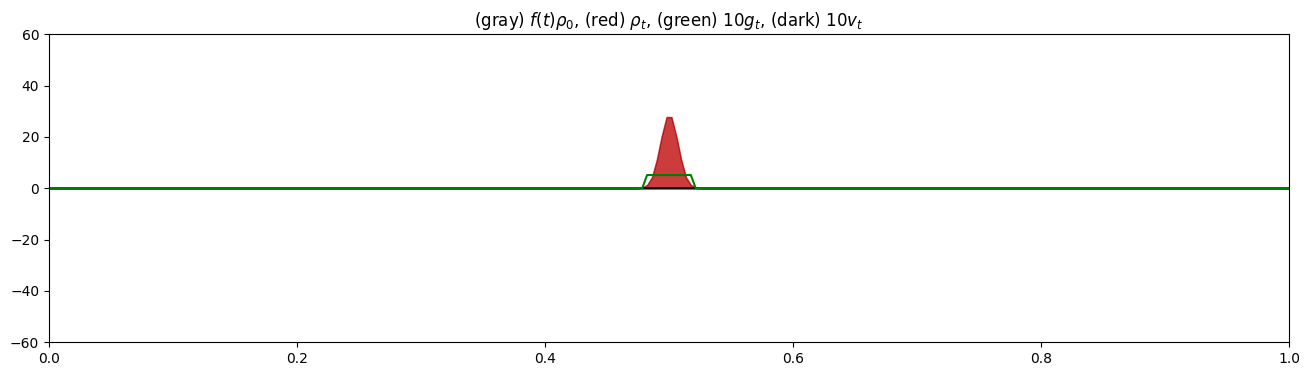

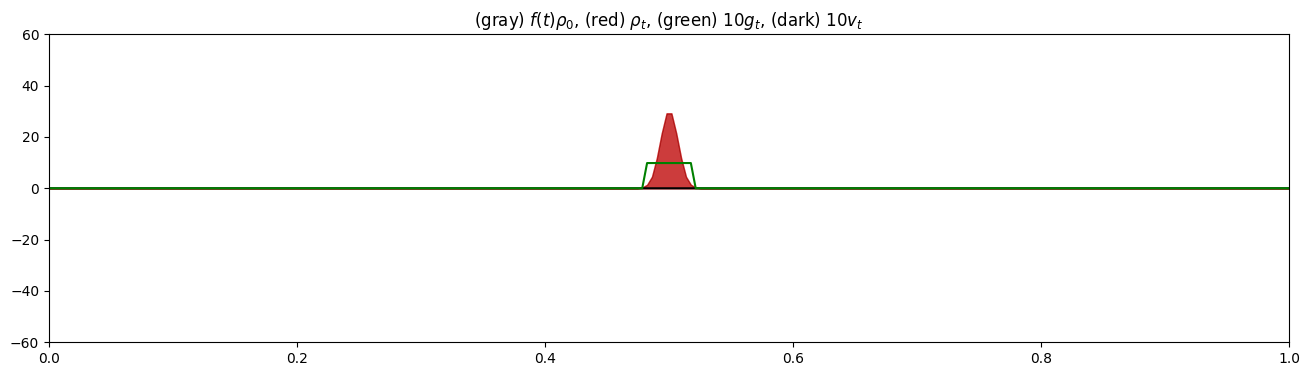

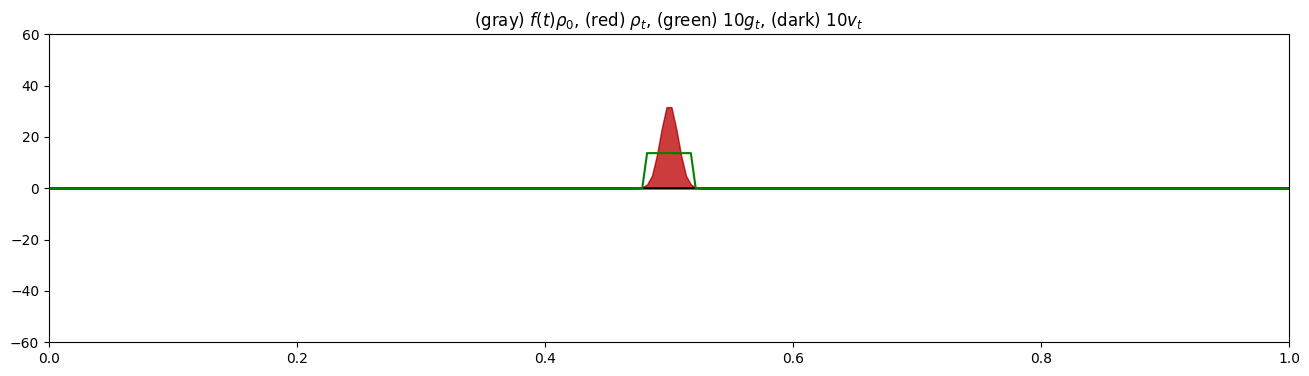

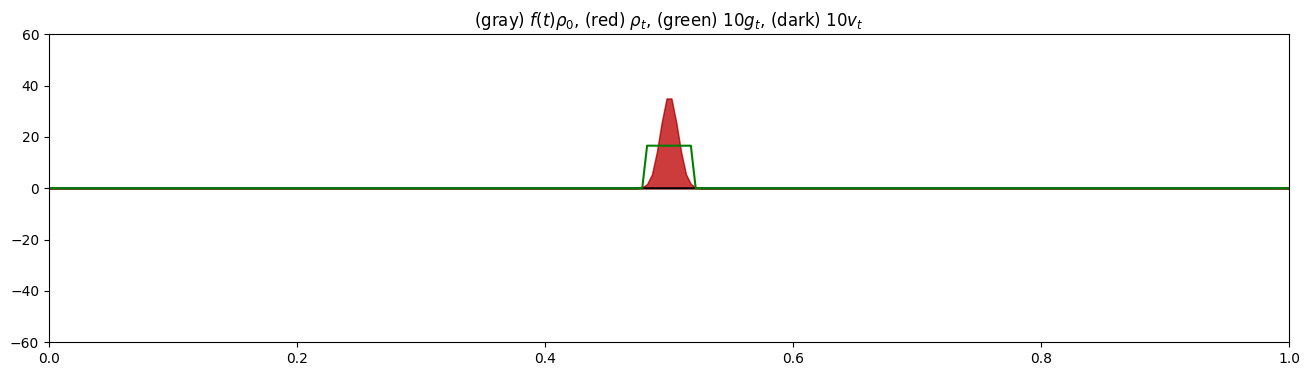

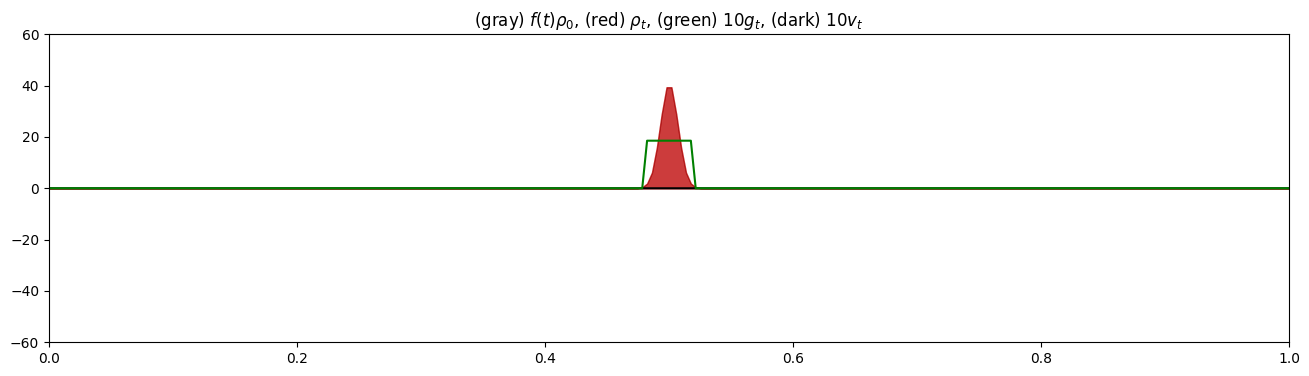

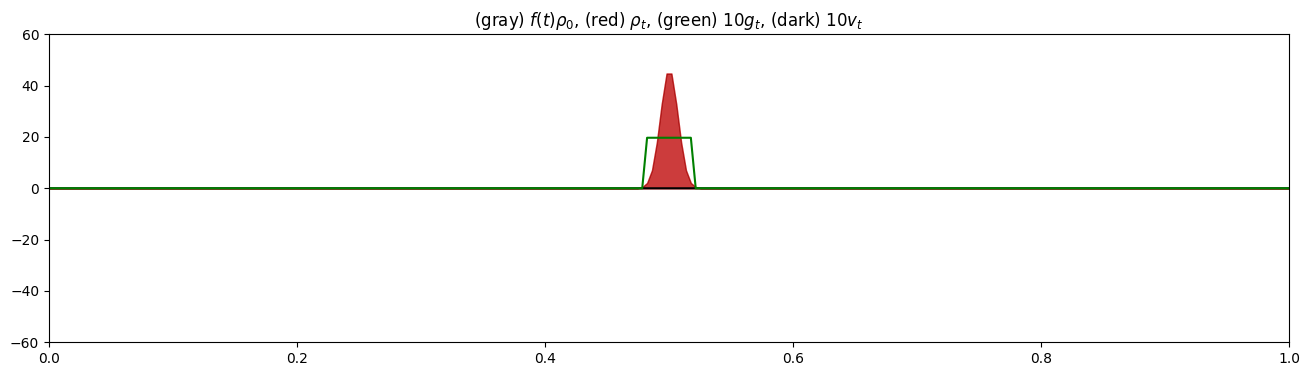

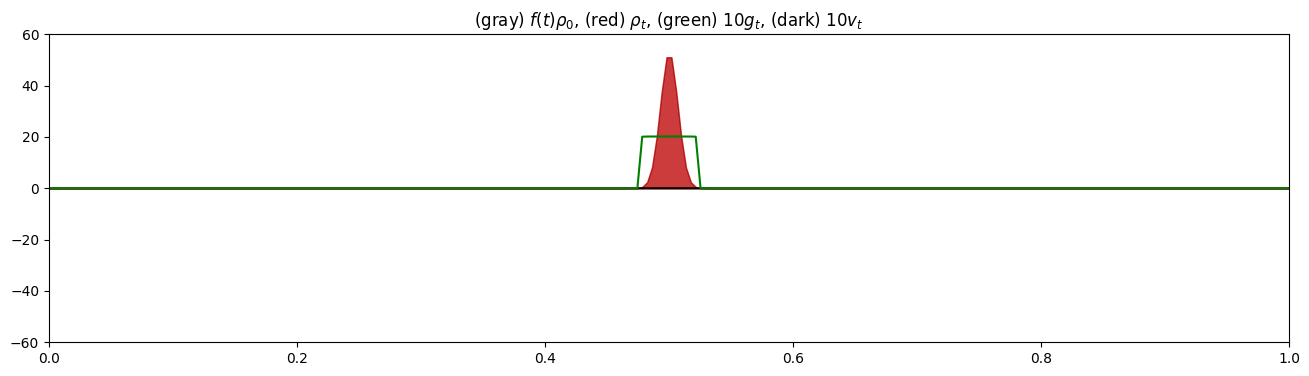

In [16]:
v,g = speed_and_growth(x.V)
for t in range(0, T):
    plt.figure(figsize=(16, 4))
    #plt.fill_between(X, rho_0, color="k", alpha=0.2)
    #plt.fill_between(X, rho_1, color="b", alpha=0.2)
    plt.fill_between(X, x.V.D[0][t], color="r", alpha=0.7)  # Adjust index for 0-based Python
    plt.fill_between(X, rho_0*(2*((t+0.5)/T-0.5)**2+0.5), color="k", alpha=0.2)
    plt.plot(X, 10*v[0][t, :], "k")
    plt.plot(X, 10*g[t, :], "g")  # Adjust index for 0-based Python
    plt.title("(gray) $f(t)\\rho_0$, (red) $\\rho_t$, (green) $10g_t$, (dark) $10v_t$")
    plt.axis([0, 1, -60, 60])
    plt.show()

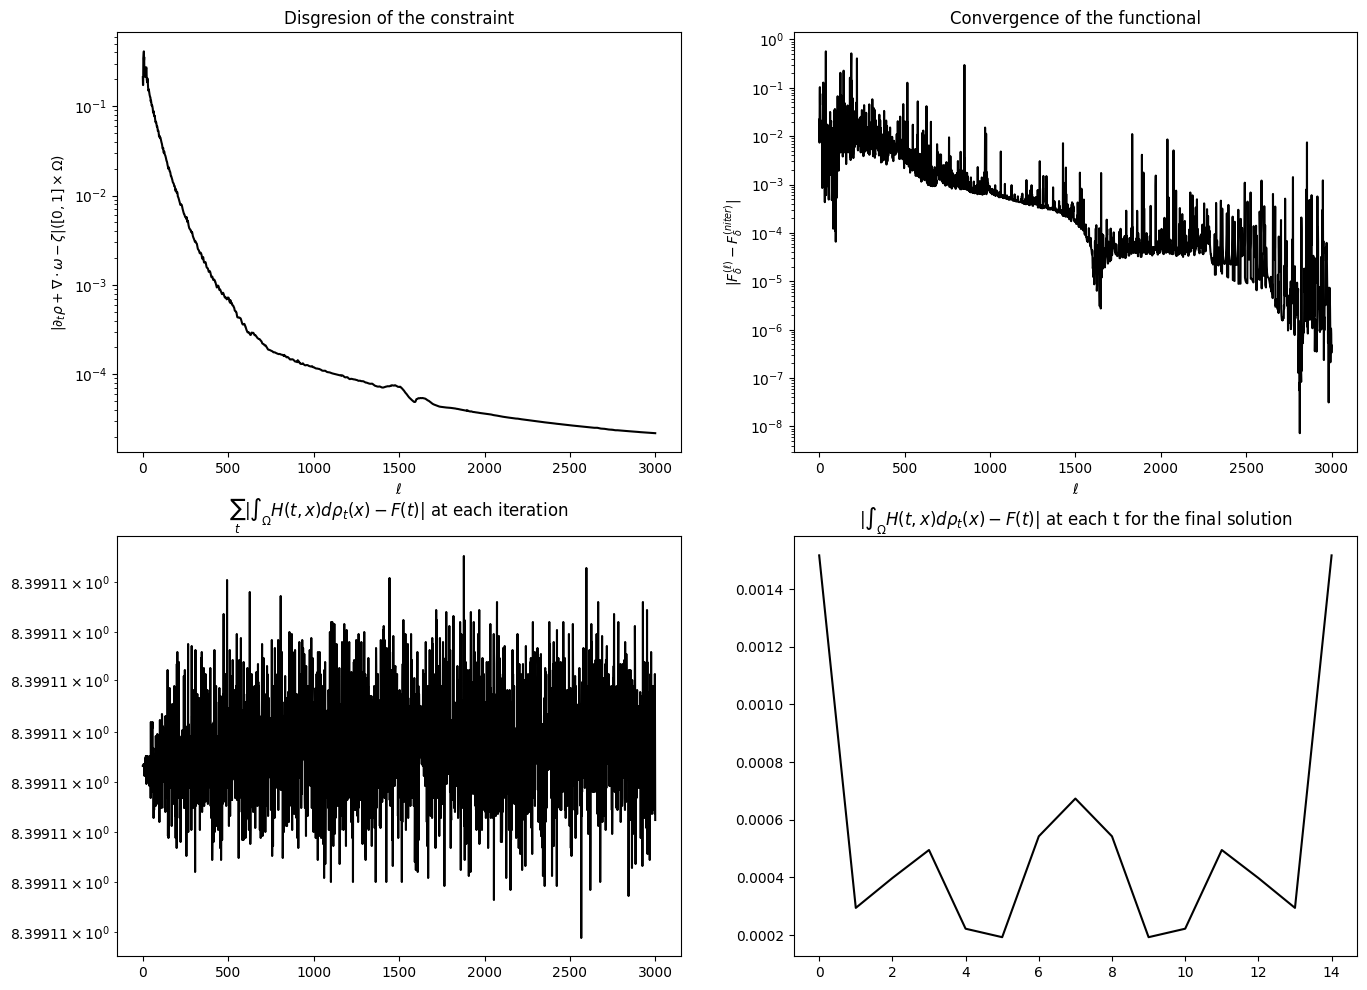

In [7]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.ylabel(r"$|\partial_t \rho + \nabla \cdot \omega - \zeta|([0,1]\times \Omega)$")
plt.xlabel(r"$\ell$")
plt.title("Disgresion of the constraint")
plt.semilogy(lists[1], "k")

plt.subplot(2, 2, 2)
plt.ylabel(r"$|F_{\delta}^{(\ell)}-F_{\delta}^{(niter)}|$")
plt.xlabel(r"$\ell$")
plt.title("Convergence of the functional")
minF = np.min(lists[0][-10:])
plt.semilogy(np.minimum(1, np.abs(lists[0] - np.mean(lists[0][-10:]))), "k")

plt.subplot(2, 2, 3)
plt.title("$\sum_{t}|\int_{\Omega}H(t,x)d\\rho_t(x)-F(t)|$ at each iteration")
plt.semilogy(lists[2], "k")

plt.subplot(2, 2, 4)
plt.title("$|\int_{\Omega}H(t,x)d\\rho_t(x)-F(t)|$ at each t for the final solution")
plt.plot(np.abs(np.sum(x.V.D[0]*H, axis=1)*1./256.-F), "k")

plt.show()

